# Effect of Filters and Pooling in Convolutional Neural Networks

Let's explore how CNN work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. 

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

## 1. Load Image

In [2]:
i = misc.ascent()
print('Image shape: ' + str(i.shape))

Image shape: (512, 512)


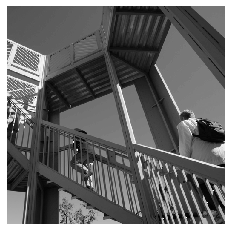

In [3]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array. Let's also get the dimensions of the image so we can loop over it later. 

In [4]:
# x along the horizontal, y along the vertical
size_x = i.shape[0]
size_y = i.shape[1]

## 2. Create Filters
Now we can create a filter as a 3x3 array. 

In [5]:
# This filter detects edges nicely.
# It creates a convolution that only passes through sharp edges and straight lines.

filter1 = [ [0, 1, 0], 
          [1, -4, 1], 
          [0, 1, 0]]
filter2 = [ [-1, -2, -1],
           [0, 0, 0], 
           [1, 2, 1]]
filter3 = [ [-1, 0, 1], 
          [-2, 0, 2], 
         [-1, 0, 1]]

filters = [filter1, filter2, filter3]
n_filters = len(filters)

# If all the digits in the filter don't add up to 0 or 1, you should probably do a weight to get it to do so
# so, for example, if your filter elements are 1,1,1,1,2,1,1,1,1,
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weights  = [1, 1, 1]

## 3. Convolution
Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally we'll load the new value into the transformed image. 

In [6]:
i_transformed = np.zeros((n_filters, ) + i.shape)
for index in range(n_filters):
    filter = filters[index]
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            convolution = 0.0
            convolution = convolution + (i[x - 1, y - 1] * filter[0][0])
            convolution = convolution + (i[x, y - 1] * filter[1][0])
            convolution = convolution + (i[x + 1, y - 1] * filter[2][0])
            convolution = convolution + (i[x - 1, y] * filter[0][1])
            convolution = convolution + (i[x, y] * filter[1][1])
            convolution = convolution + (i[x + 1, y] * filter[2][1])
            convolution = convolution + (i[x - 1, y + 1] * filter[0][2])
            convolution = convolution + (i[x, y + 1] * filter[1][2])
            convolution = convolution + (i[x + 1, y + 1] * filter[2][2])
            convolution *= weights[index]
            if(convolution < 0):
                convolution = 0
            if(convolution > 255):
                convolution = 255
            i_transformed[index, x, y] = convolution

Filter 0:
[0, 1, 0]
[1, -4, 1]
[0, 1, 0]

Filter 1:
[-1, -2, -1]
[0, 0, 0]
[1, 2, 1]

Filter 2:
[-1, 0, 1]
[-2, 0, 2]
[-1, 0, 1]



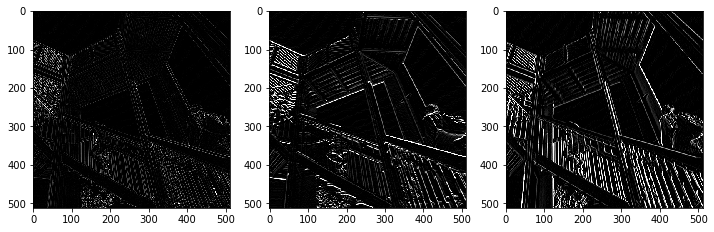

In [7]:
# Plot the image

fig = plt.gcf()
fig.set_size_inches(n_filters * 4, 4)
for index in range(n_filters):
    sp = plt.subplot(1, n_filters, index + 1)
    sp.imshow(i_transformed[index])
    print('Filter ' + str(index) + ':')
    print('\n'.join(str(filters[index][i]) for i in range(3)))
    print()

## 4. Pooling
The following code will show a (2, 2) max pooling. The idea here is to iterate over the image, and look at the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old - with the dimensions on X and Y being halved by this process. We'll see that the features get maintained despite this compression.

In [8]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
newImages = np.zeros((n_filters, ) + (new_x, new_y))
for index in range(n_filters):
    for x in range(0, size_x, 2):
        for y in range(0, size_y, 2):
            pixels = []
            pixels.append(i_transformed[index, x, y])
            pixels.append(i_transformed[index, x + 1, y])
            pixels.append(i_transformed[index, x, y + 1])
            pixels.append(i_transformed[index, x + 1, y + 1])
            newImages[index, int(x / 2), int(y / 2)] = max(pixels)

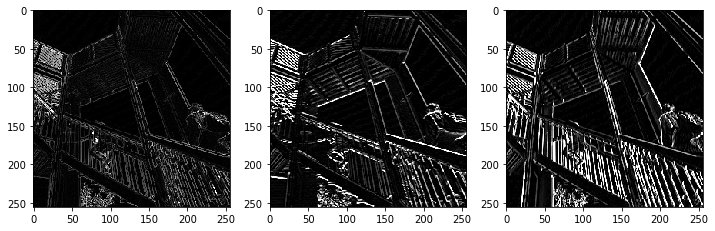

In [9]:
# Plot the image

fig = plt.gcf()
fig.set_size_inches(n_filters * 4, 4)
for index in range(n_filters):
    sp = plt.subplot(1, n_filters, index + 1)
    sp.imshow(newImages[index])